# LAB 1
## Load Data and visualize
In this Lab you will load measurements from a text file<br>
We could do it by hands but we will use the library pandas. It is a powerful tool for timeseries processing but it is however not efficient for real-time application. <br>
First let's import required libraries.

In [74]:
import os, sys
import pandas
import numpy as np
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt

## Read a measurement csv file

### old school way
open file <br>
parse file

### pandas
A csv file can be read directly using pandas. Dates can be parsed directly when the format is standard. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html <br>
In our case, hour is given as decimal which is not a supported standard. It required then to do it separately.

In [75]:
with open('DATA/BSRN_PAY_1MIN_2005.csv',encoding='Windows-1252') as f:
    for line in f:
        if line.startswith('#'):
            if 'longitude' in line :
                longitude=float(line.strip().split(' ')[-1])
            continue
        data=line.strip().split(';')
                

In [76]:
longitude

6.944

In [77]:
Data=pandas.read_csv('DATA/BSRN_PAY_1MIN_2005.csv',sep=';',comment='#',header=None,names=['Year','Month','Day','UT','GHI','DHI','BNI','T2','RH'])

Visualise the first rows of the results with the head command

In [78]:
Data.head()

,Year,Month,Day,UT,GHI,DHI,BNI,T2,RH
0,2005,1,1,0.016667,-1.0,0.0,-999.0,0.0,100.0
1,2005,1,1,0.033333,-1.0,0.0,-999.0,0.0,100.0
2,2005,1,1,0.050000,-1.0,0.0,-999.0,0.0,100.0
3,2005,1,1,0.066667,-1.0,-1.0,-999.0,0.0,100.0
4,2005,1,1,0.083333,-1.0,-1.0,-999.0,0.0,100.0


As said previously the time is not in a standard format the following lines convert UT time to Hour Minute

In [79]:
Data['Hours']=Data.UT.astype(int)
Data['Minutes']=np.round((Data.UT-Data.Hours)*60.)

Check the results using head command once again

In [80]:
Data.head()

,Year,Month,Day,UT,GHI,DHI,BNI,T2,RH,Hours,Minutes
0,2005,1,1,0.016667,-1.0,0.0,-999.0,0.0,100.0,0,1.0
1,2005,1,1,0.033333,-1.0,0.0,-999.0,0.0,100.0,0,2.0
2,2005,1,1,0.050000,-1.0,0.0,-999.0,0.0,100.0,0,3.0
3,2005,1,1,0.066667,-1.0,-1.0,-999.0,0.0,100.0,0,4.0
4,2005,1,1,0.083333,-1.0,-1.0,-999.0,0.0,100.0,0,5.0


Now that it is standard, it can be converted to datetime format.<br>
Use the pandas to_datetime command: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [81]:
Data['Datetime']=pandas.to_datetime(Data[['Year','Month','Day','Hours','Minutes']],utc=True)

In [82]:
Data=Data.drop(['Year','Month','Day','Hours','Minutes','UT'],axis=1)

In [83]:
Data.head()

,GHI,DHI,BNI,T2,RH,Datetime
0,-1.0,0.0,-999.0,0.0,100.0,2005-01-01 00:01:00+00:00
1,-1.0,0.0,-999.0,0.0,100.0,2005-01-01 00:02:00+00:00
2,-1.0,0.0,-999.0,0.0,100.0,2005-01-01 00:03:00+00:00
3,-1.0,-1.0,-999.0,0.0,100.0,2005-01-01 00:04:00+00:00
4,-1.0,-1.0,-999.0,0.0,100.0,2005-01-01 00:05:00+00:00


Check the regularity of the time stamps <br>
Mean should be 1 min

In [84]:
Data.Datetime.diff().mean()

Timedelta('0 days 00:01:00.002169')

The standard deviation should be close to 0

In [85]:
Data.Datetime.diff().std()

Timedelta('0 days 00:00:01.657311')

Set datetime as index: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html

In [86]:
Data.set_index('Datetime',inplace=True)
#Data=Data.set_index('Datetime')

In [87]:
Data

,GHI,DHI,BNI,T2,RH
Datetime,,,,,
2005-01-01 00:01:00+00:00,-1.0,0.0,-999.0,0.0,100.0
2005-01-01 00:02:00+00:00,-1.0,0.0,-999.0,0.0,100.0
2005-01-01 00:03:00+00:00,-1.0,0.0,-999.0,0.0,100.0
2005-01-01 00:04:00+00:00,-1.0,-1.0,-999.0,0.0,100.0
2005-01-01 00:05:00+00:00,-1.0,-1.0,-999.0,0.0,100.0
...,...,...,...,...,...
2005-12-31 23:56:00+00:00,-3.0,-3.0,-999.0,4.9,87.8
2005-12-31 23:57:00+00:00,-3.0,-3.0,-999.0,4.8,88.1
2005-12-31 23:58:00+00:00,-3.0,-3.0,-999.0,4.8,88.6


Create a 1-min date vector starting at 20050101T00:01:00Z and ending at 20051231T24:00 <br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

In [88]:
utc=pytz.timezone('UTC')
date_begin=datetime(2005,1,1,0,1,0,tzinfo=utc)
date_end=datetime(2006,1,1,0,0,0,tzinfo=utc)
complete_index=pandas.date_range(date_begin,date_end,freq='1min',tz='UTC')

In [89]:
complete_index

DatetimeIndex(['2005-01-01 00:01:00+00:00', '2005-01-01 00:02:00+00:00',
               '2005-01-01 00:03:00+00:00', '2005-01-01 00:04:00+00:00',
               '2005-01-01 00:05:00+00:00', '2005-01-01 00:06:00+00:00',
               '2005-01-01 00:07:00+00:00', '2005-01-01 00:08:00+00:00',
               '2005-01-01 00:09:00+00:00', '2005-01-01 00:10:00+00:00',
               ...
               '2005-12-31 23:51:00+00:00', '2005-12-31 23:52:00+00:00',
               '2005-12-31 23:53:00+00:00', '2005-12-31 23:54:00+00:00',
               '2005-12-31 23:55:00+00:00', '2005-12-31 23:56:00+00:00',
               '2005-12-31 23:57:00+00:00', '2005-12-31 23:58:00+00:00',
               '2005-12-31 23:59:00+00:00', '2006-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=525600, freq='T')

Use the reindex command to use the previous vector as an index:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html

In [90]:
idx=Data[Data.index.duplicated()].index

In [91]:
Data.loc[idx]

,GHI,DHI,BNI,T2,RH
Datetime,,,,,
2005-02-09 13:02:00+00:00,452.0,71.0,873.0,5.2,55.4
2005-02-09 13:02:00+00:00,452.0,71.0,873.0,5.2,55.4


In [92]:
Data=Data.drop(Data.index[Data.index.duplicated()])

In [93]:
Data=Data.reindex(complete_index)

Replace all the missing values (-999) by numpy not a number value (pandas replace command)

In [94]:
Data=Data.replace(-999,np.nan)

Check if data were missing in the initial dataset. Output date where data is missing

In [95]:
Data[Data.isnull().any(axis=1)]
#Data[Data['GHI'].isnull()]

,GHI,DHI,BNI,T2,RH
2005-01-01 00:01:00+00:00,-1.0,0.0,NaN,0.0,100.0
2005-01-01 00:02:00+00:00,-1.0,0.0,NaN,0.0,100.0
2005-01-01 00:03:00+00:00,-1.0,0.0,NaN,0.0,100.0
2005-01-01 00:04:00+00:00,-1.0,-1.0,NaN,0.0,100.0
2005-01-01 00:05:00+00:00,-1.0,-1.0,NaN,0.0,100.0
...,...,...,...,...,...
2005-12-31 23:56:00+00:00,-3.0,-3.0,NaN,4.9,87.8
2005-12-31 23:57:00+00:00,-3.0,-3.0,NaN,4.8,88.1
2005-12-31 23:58:00+00:00,-3.0,-3.0,NaN,4.8,88.6
2005-12-31 23:59:00+00:00,-3.0,-3.0,NaN,4.8,88.8


Plot values. In Jupyter there is a shortcut for importing all you need: %pylab inline <br>
But be careful it replaces all the import you made before. We will not do it here since we import all libraries in the first cell.<br>
In pandas you can run directly plot on the desired column.

C:\Users\aboilley\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0, 0.5, 'W.$m^{-2}$')

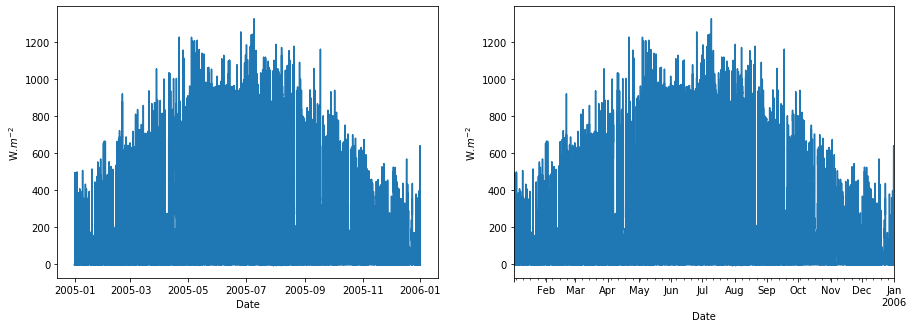

In [96]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
Data.GHI.plot()
plt.xlabel('Date')
plt.ylabel(r'W.$m^{-2}$')
plt.subplot(1,2,1)
plt.plot(Data.GHI)
plt.xlabel('Date')
plt.ylabel(r'W.$m^{-2}$')

Do the same but for a restricted date range (10 days during 2005).

C:\Users\aboilley\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0, 0.5, 'W.$m^{-2}$')

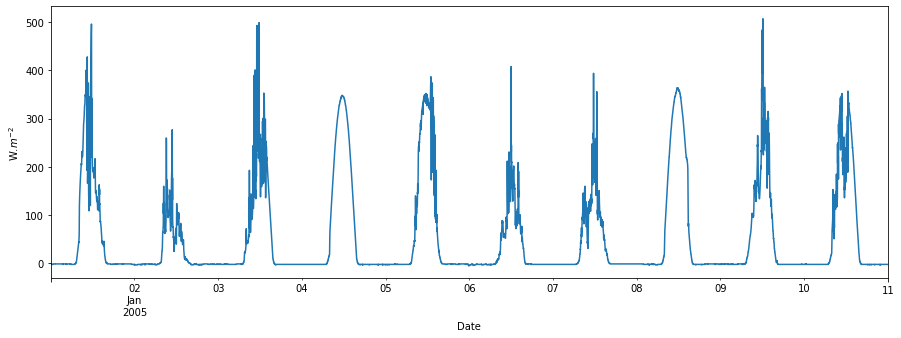

In [97]:
plt.figure(figsize=(15,5))
Data.loc[(Data.index > date_begin) & 
         (Data.index < date_begin+timedelta(days=10)),'GHI'].plot()
plt.xlabel('Date')
plt.ylabel(r'W.$m^{-2}$')

Plot data on a 2D plot minutes against day.<br>
Use the imshow command. You need to reshape the data in the right dimensions which means to know the number of days in 2005 and the number of minutes a day. At the end add a colorbar.

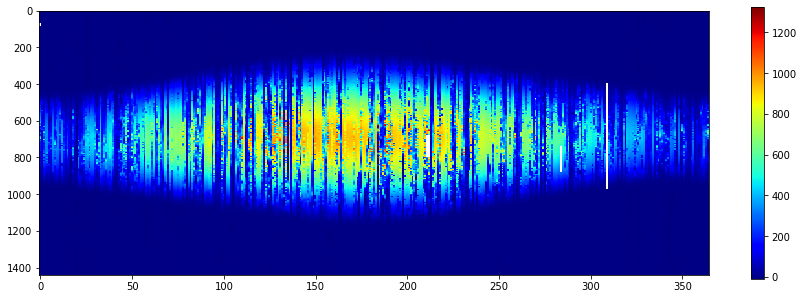

In [98]:
GHIr=np.reshape(Data.GHI.values,(365,1440))
plt.figure(figsize=(15,5))
plt.imshow(GHIr.T,aspect=.1,cmap='jet')
plt.colorbar()

Do the same on all interesting columns of the data ['GHI', 'DHI', 'BNI', 'T2', 'RH'] using a loop and subplot command.

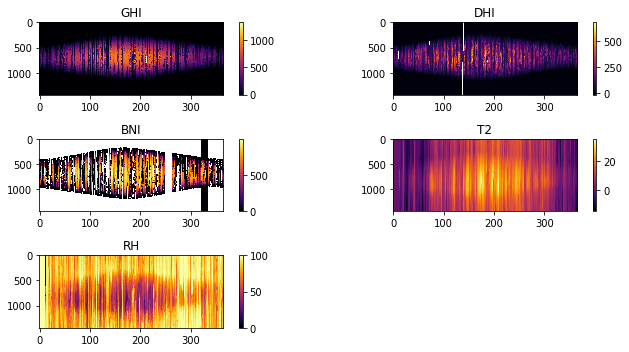

In [99]:
plt.figure(figsize=(10,5))
for i,k in enumerate(Data.columns):
    plt.subplot(3,2,i+1)
    plt.imshow(np.reshape(Data[k].values,(365,1440)).T,aspect=.1,cmap='inferno')
    plt.colorbar()
    plt.title(k)
plt.tight_layout()

# LAB 2
## Call web services 
In this Lab you will call web services to obtain solar position or top of atmosphere irradiance for example<br>
For readability purposes the functions has been coded outside this notebook. It can be found in python_functions directory. By default this directory is not known by jupyter. We need to add it to path.

In [100]:
module_path = os.path.abspath(os.path.join('python_functions'))
if module_path not in sys.path:
    sys.path.append(module_path)

Import the wps module which contains all the call functions

In [101]:
import wps

You already have a dataset called SG2.zip in the repository. You can load it using pandas read_pickle command, or you can call the wps_SG2 functions to obtain solar position. You should set a variable called location:<br>
location=[46.815000, 6.944000, 491]

In [102]:
location=[46.815000, 6.944000, 491]
wps.wps_SG2(location,date_begin,date_end,3)

,JDUT,YYYY,MM,DD,H,DOY,DELTA,OMEGA,GAMMA_S0,ALPHA_S,R
0,2.453372e+06,2005,1,1,0.0167,1,-0.401657,57538.380036,-1.145944,0.248999,0.983449
1,2.453372e+06,2005,1,1,3.0167,1,-0.401482,57539.165155,-0.745896,1.362307,0.983448
2,2.453372e+06,2005,1,1,6.0167,1,-0.401310,57539.950290,-0.217344,1.927574,0.983447
3,2.453372e+06,2005,1,1,9.0167,1,-0.401134,57540.735443,0.208434,2.512440,0.983446
4,2.453372e+06,2005,1,1,12.0167,1,-0.400951,57541.520608,0.348746,3.248921,0.983445
...,...,...,...,...,...,...,...,...,...,...,...
2915,2.453736e+06,2005,12,31,9.0167,365,-0.402861,59834.100640,0.207909,2.515376,0.983462
2916,2.453736e+06,2005,12,31,12.0167,365,-0.402699,59834.885800,0.346814,3.251264,0.983460
2917,2.453736e+06,2005,12,31,15.0167,365,-0.402528,59835.670959,0.107308,3.950191,0.983458
2918,2.453736e+06,2005,12,31,18.0167,365,-0.402351,59836.456104,-0.363629,4.504122,0.983456


In [103]:
location=[46.815000, 6.944000, 491]
try:
    SG2=pandas.read_pickle('SG2.zip')
except:
    SG2=wps.wps_SG2(location,date_begin,date_end,1/60.)
    SG2.to_pickle('SG2.zip')

In [104]:
SG2.head()

,JDUT,YYYY,MM,DD,H,DOY,DELTA,OMEGA,GAMMA_S0,ALPHA_S,R
0,2.453372e+06,2005,1,1,0.0083,1,-0.401657,57538.377855,-1.146309,0.244209,0.983449
1,2.453372e+06,2005,1,1,0.0250,1,-0.401656,57538.382216,-1.145572,0.253783,0.983449
2,2.453372e+06,2005,1,1,0.0417,1,-0.401655,57538.386578,-1.144808,0.263329,0.983449
3,2.453372e+06,2005,1,1,0.0583,1,-0.401654,57538.390940,-1.144017,0.272845,0.983449
4,2.453372e+06,2005,1,1,0.0750,1,-0.401653,57538.395302,-1.143198,0.282331,0.983449


Set index to the SG2 dataframe (you should not do it this way normally) and merge it to the Data Dataframe. you can drop not interesting features (use the head command to determine it).

In [105]:
SG2=SG2.set_index(complete_index).drop(['JDUT','YYYY','MM','DD','H','DOY','DELTA'],axis=1)

In [106]:
Data=Data.merge(SG2,left_index=True,right_index=True)

In [107]:
Data.head()

,GHI,DHI,BNI,T2,RH,OMEGA,GAMMA_S0,ALPHA_S,R
2005-01-01 00:01:00+00:00,-1.0,0.0,NaN,0.0,100.0,57538.377855,-1.146309,0.244209,0.983449
2005-01-01 00:02:00+00:00,-1.0,0.0,NaN,0.0,100.0,57538.382216,-1.145572,0.253783,0.983449
2005-01-01 00:03:00+00:00,-1.0,0.0,NaN,0.0,100.0,57538.386578,-1.144808,0.263329,0.983449
2005-01-01 00:04:00+00:00,-1.0,-1.0,NaN,0.0,100.0,57538.390940,-1.144017,0.272845,0.983449
2005-01-01 00:05:00+00:00,-1.0,-1.0,NaN,0.0,100.0,57538.395302,-1.143198,0.282331,0.983449


You can remove the obtain dataframe to free memory using del command

In [108]:
del(SG2)

Compute the solar zenithal angle using the solar elevation angle GAMMA_S0

In [109]:
Data['THETAS']=np.pi/2-Data.GAMMA_S0
Day=np.reshape(Data['GAMMA_S0'].values,(365,1440))>0

Plot as before the 2D plot in minutes against day. Try to set proper xlabel (xticks).

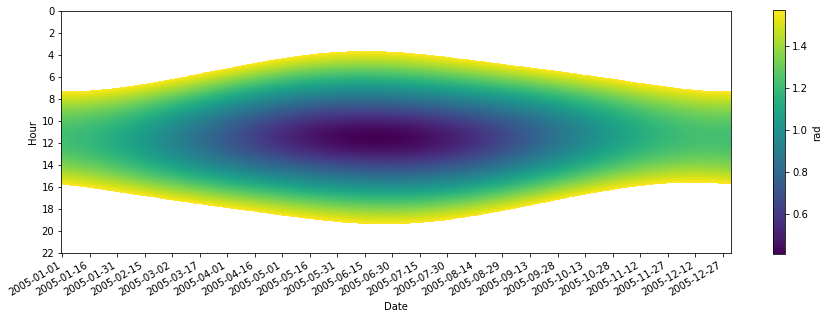

In [110]:
days=pandas.date_range(date_begin,date_end,freq='D')
fig=plt.figure(figsize=(15,5))
el=np.reshape(Data.THETAS.values,(365,1440))
el[~Day]=np.nan
plt.imshow(el.T,aspect=.1)
cb=plt.colorbar()
cb.set_label('rad')
plt.xticks(range(0,365,15),days[::15].strftime('%Y-%m-%d'))
plt.yticks(range(0,1440,120),range(0,24,2))
plt.xlabel('Date')
plt.ylabel('Hour')
fig.autofmt_xdate()

Call the wps_CAMS functionto obtain top of atmosphere and Clear sky irradiation. You need to create a free account on soda-pro.com website. Or load the CAMS.zip file from the repository.

In [111]:
email='me@myself.com'
try:
    CAMS=pandas.read_pickle('CAMS.zip')
except:
    CAMS=wps.wps_CAMS_RAD(location,date_begin,date_end,1/60.,email)
    CAMS.to_pickle('CAMS.zip')

Set the index and merge it to Data as for SG2. In the merge command you can specify suffixes.

In [117]:
CAMS=CAMS.set_index(complete_index)

In [120]:
Data=Data.merge(CAMS,left_index=True,right_index=True,suffixes=('','_CAMS'))

Check if successful using head

In [121]:
Data.head()

,GHI,DHI,BNI,T2,RH,OMEGA,GAMMA_S0,ALPHA_S,R,THETAS,TOA,CLEAR_SKY_GHI,CLEAR_SKY_BHI,CLEAR_SKY_DHI,CLEAR_SKY_BNI,GHI_CAMS,BHI,DHI_CAMS,BNI_CAMS,Reliability
2005-01-01 00:01:00+00:00,-1.0,0.0,NaN,0.0,100.0,57538.377855,-1.146309,0.244209,0.983449,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2005-01-01 00:02:00+00:00,-1.0,0.0,NaN,0.0,100.0,57538.382216,-1.145572,0.253783,0.983449,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2005-01-01 00:03:00+00:00,-1.0,0.0,NaN,0.0,100.0,57538.386578,-1.144808,0.263329,0.983449,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2005-01-01 00:04:00+00:00,-1.0,-1.0,NaN,0.0,100.0,57538.390940,-1.144017,0.272845,0.983449,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2005-01-01 00:05:00+00:00,-1.0,-1.0,NaN,0.0,100.0,57538.395302,-1.143198,0.282331,0.983449,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# LAB 3
## Apply different Quality check

### QC Extremely Rare Limit (ERL) for GHI
To compute this QC, find the formula in the presentation of P. Blanc of Tuesday afternoon.<br>
You need to compute first the TOANI = TOA / cos(solar zenithal angle)<br>

In [134]:
Data['TOANI']=60*Data.TOA/np.cos(Data.THETAS)

Compute the QC ERL for GHI
−2 $W.m^{-2}$  < 𝑮𝑯𝑰 < 1.2𝐼_0 cos⁡(𝑆𝑍𝐴)^1.2+50

𝐼0 : irradiance at the top of atmosphere at normal incidence<br>
𝑆𝑍𝐴 : solar zenithal angle

In [143]:
QC_GHI_ERL = (Data.GHI <= (0.03*Data.TOA)) | (Data.GHI > 1.2*Data.TOANI*np.cos(Data.THETAS)**1.2 + 50)
QC_GHI_ERL[Data.GAMMA_S0<0] = False

Visualize the data removed by the QC

In [144]:
QC_GHI_ERL

2005-01-01 00:01:00+00:00    False
2005-01-01 00:02:00+00:00    False
2005-01-01 00:03:00+00:00    False
2005-01-01 00:04:00+00:00    False
2005-01-01 00:05:00+00:00    False
                             ...  
2005-12-31 23:56:00+00:00    False
2005-12-31 23:57:00+00:00    False
2005-12-31 23:58:00+00:00    False
2005-12-31 23:59:00+00:00    False
2006-01-01 00:00:00+00:00    False
Freq: T, Length: 525600, dtype: bool

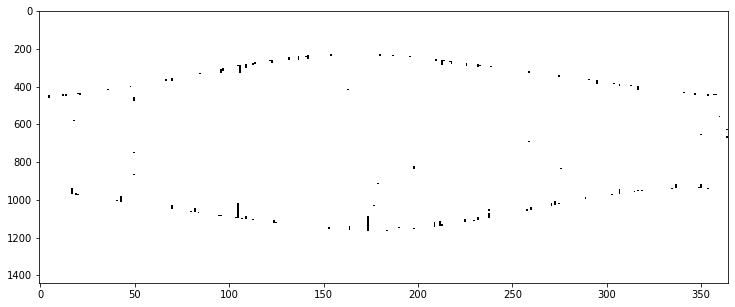

In [147]:
plt.figure(figsize=(15,5))
plt.imshow(np.reshape(QC_GHI_ERL.values,(365,1440)).T,cmap='Greys',aspect=.1)

### QC Extremely Rare Limit (ERL) for DHI
Same as above compute the QC but for DHI

−2 $W.m^{-2}$  < 𝑫𝑯𝑰 < 0.75𝐼_0 cos⁡(𝑆𝑍𝐴)^1.2+30

In [148]:
QC_DHI_ERL = (Data.DHI <= (0.03*Data.TOA)) | (Data.DHI > .75*Data.TOANI*np.cos(Data.THETAS)**1.2 + 30)
QC_DHI_ERL[Data.GAMMA_S0<0] = False

Once again visualize the removed data

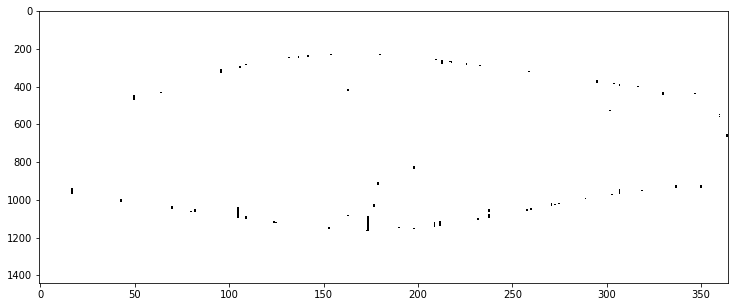

In [149]:
plt.figure(figsize=(15,5))
plt.imshow(np.reshape(QC_DHI_ERL.values,(365,1440)).T,cmap='Greys',aspect=.1)

### QC Extremely Rare Limit (ERL) for BNI
Same as above compute the QC but for BNI

− 2 $W.m^{-2}$ < 𝑩𝑯𝑰=𝑩𝑵𝑰cos(SZA) < 0.95 𝐼0cos(SZA)^1.2+10

In [152]:
QC_BNI_ERL = (Data.BNI > 0.95*Data.TOA*np.cos(Data.THETAS)**0.2 + 10)
QC_BNI_ERL[Data.THETAS>=np.pi/2] = False

Visualize removed data

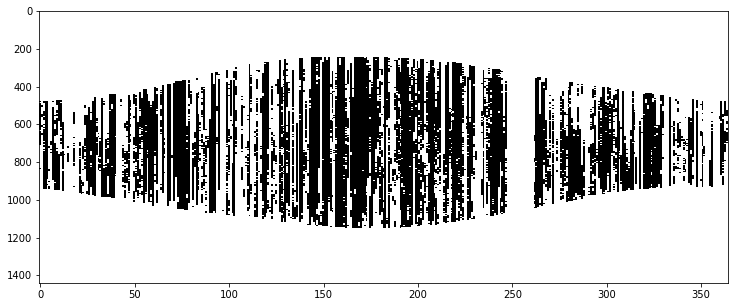

In [153]:
plt.figure(figsize=(15,5))
plt.imshow(np.reshape(QC_BNI_ERL.values,(365,1440)).T,cmap='Greys',aspect=.1)

### Set to NaN all the QC flagged data

In [156]:
Data.GHI[QC_GHI_ERL]=np.nan
Data.DHI[QC_DHI_ERL]=np.nan
Data.BNI[QC_BNI_ERL]=np.nan

Visualise the remaining data

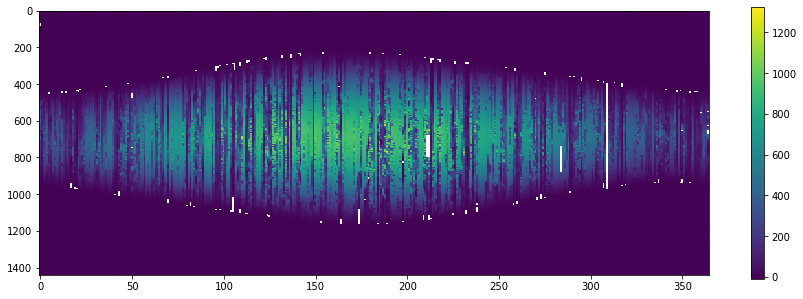

In [158]:
GHIr=np.reshape(Data.GHI.values,(365,1440))
plt.figure(figsize=(15,5))
plt.imshow(GHIr.T,aspect=.1)
plt.colorbar()

### 2-component test on GHI, DHI

### (KT, KD) diagram
Plot the KT,KD diagram.

Create a mask to remove:
- nan data in ghi and toa
- data before sunrise
- data when TOA is under 20 $W.m^{-2}$

Compute the KD

Compute the histogram2d of kd, kd

Plot the kt, kd diagram

### 3 component test GHI, DHI, BNI

Count the number of values removed

### Use a WPS for local horizon computation
Use the wps_Horizon function or load HZ_SRTM.zip file

Plot the obtained horizon above the elevation, azimuth 2d plot

Plot a scatter and the horizon above.

### Compute common statistics
- reference mean
- rmse
- relative mean
- relative rmse
- correlation coefficient